<H1> Lab 5 </H1>

<H2> Function block </H2>

<H3>
Draw plot
</H3>

In [92]:


from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    for i in range(len(x)):
        #print(i)
        c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot_only(x_min, xk, w_norm, flag, foo):
    fig, ax = plt.subplots(figsize = (10,10))

    # print(xk[0])
    # print(xk[1])
    # print(fk)
    x, y = np.meshgrid(np.linspace(min(xk[0]) - 0.1, max(xk[0]) + 0.1), np.linspace(min(xk[1]) - 0.1, max(xk[1]) + 0.1))
    

    #x, y = np.meshgrid(np.linspace(xk[0][0], xk[0][-1], 1000), np.linspace(xk[1][0], xk[1][-1], 1000))
    x, y = xk[0], xk[1]
    z = foo(x, y)
    print(z)
    #rea = foo(xk[0], xk[1])
    #print(rea)

    #построим линии уровня
    ax.contour(x, y, z)
    #траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    #подписи к осям
    ax.set_xlabel('$x$', fontsize = 15)
    ax.set_ylabel('$y$', fontsize = 15)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 16})

    #создадим сетку 
    plt.grid(linestyle = '-')

    plt.show()

    pass

def draw_all(x0, x_min, xk, w_norm, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    # v.sort()
    # print(v)

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    #ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    #v = plpl(foo, xk[0], xk[1])

    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    #v = plpl(foo, xk[0], xk[1])
    #v.sort()
    # построим линии уровня
    ax2.contour(x, y, z)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass




<H3> Golden Ratio </H3>

In [65]:
import numpy as np
import math
eps = 10**(-2)
def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk >= e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1 
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
            
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


<H3> Newton

In [118]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-2)

def newton_method(foo, eps = e, x = np.array(x0), nu: float = 0.8, omega: float = 0.5,  flag: int = 0, flag1: int = 0):

    n_f = 0
    n_g = 0
    n_d = 0

    kappa_k = 1
    kappa_max = 25

    x = np.array(x)

    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')
    
    
    f = lambda x: foo(x[0], x[1])
    
    grad = lambda x: grad_f(x[0], x[1])

    anti_grad = lambda x: np.array(-grad_f(x[0], x[1]))

    xk = [[],[]]
    xk[0].append(x[0])
    xk[1].append(x[1])



    n = 2 #hess.ndim #момент обновления алгоритма
    Ak = np.identity(n)

    w_norm = []    
    wk = np.array(anti_grad(x))
    n_g += 1
    w_norm.append(np.linalg.norm(wk))

    x_prev = x
    wk_prev = wk
    n_hess = 0
    

    while w_norm[-1] > eps:

        n_d += 1
        

        pk = Ak.dot(wk)       
        #pk = pk / np.linalg.norm(pk)

        phi_k = lambda kappa: f(x + kappa * pk)

        temp = 0        
        kappa_k, temp = method_goldenRatio(phi_k, 1, 0, eps/1000)
        #kappa_k, nnn, temp = optimize.golden(phi_k, full_output=True)      

        n_f += temp

        x = x + kappa_k * pk
        wk = anti_grad(x)
        n_g += 1

        w_norm.append(np.linalg.norm(wk))
        xk[0].append(x[0])
        xk[1].append(x[1])

        if n_d % 5 == 0:
            Ak = np.identity(n)
        else:
            dx = x - x_prev
            dx_m = np.array([[dx[0], 0], [dx[1], 0]])
            dw = wk - wk_prev
            dw_m = np.array([[dw[0], 0], [dw[1], 0]])
            dA =  - ( dx_m.dot(dx_m.T) / (dw.dot(dx)) + (Ak.dot(dw_m.dot(dw_m.T.dot(Ak.T)))) / np.dot(Ak.dot(dw), dw) )          
            Ak = Ak + dA
            
        
        
        x_prev = x
        wk_prev = wk
        


        
    return x, xk, w_norm, n_f, n_g, n_d, n_hess


In [67]:
from functools import reduce
import numpy as np
B = np.array([[1/2, 0], [-1 , 0]])#
C = np.array([1/2,-1])
R = np.array([0,-1])
#print(np.dot(C, B), np.dot(B.T, C))
print(B.dot(B.T))
#r = np.ones(2, 4)
#print(r)
print(C.dot(R))
#print(np.dot(C, T))
#np.matrix.transpose(C)


[[ 0.25 -0.5 ]
 [-0.5   1.  ]]
1.0


<H3> Print function </H3>

In [68]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import math

#x0 = [-1,-2]
def print_res(foo, x0 = x0, e_help = 2, flag = 0):

    #tabledata = []

    x_, y_ = Symbol('x'), Symbol('y')
    nu = 0.8
    omega = 0.5
    eps = 10**(-e_help)

    print("\n", ' ' * 30, "Методы Ньютона","\n")
    print("Дано:")
    print("-" * 24)
    print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    print("Начальное приближение:    (x, y) =", x0)
    print(" Точность приближения:    eps =", eps)
    print("-" * 24)

    for i in range (1):
        #temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод Ньютона"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 1:
            method_name = "Модификация метода Ньютона с наискорейшим спуском"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 2:
            method_name = "Модификация метода Ньютона с дроблением шага"
            print("\n", ' ' * 30, f"{method_name} \n")
        
        #i = 0


        x_min, xk, w_norm, n_f, n_g , n_d, n_hess = newton_method(foo, eps, x0, nu, omega, i)
        #temp.append(f'Квадратичная функция')    
        #temp.append(method_name)
        #temp += [ x0, method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g ]
        #tabledata1.append(temp)
        print("             Точка минимума функции:     x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        print("  Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        print("                Количество итераций:         k =",   n_d)#len(w_norm) - 1)
        print("      Количество вычислений функции:       n_f =", n_f)
        print("  Количество вычисленных градиентов:       n_g =", n_g)
        print("Количество вычисленных матриц Гессе:    n_hess =", n_hess)
        draw_all(x0, x_min, xk, w_norm, i, foo)
        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        plt.show()
    
    #a = print_tables(tabledata)


    pass




                                Методы Ньютона 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + (x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод Ньютона 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 9
      Количество вычислений функции:       n_f = 234
  Количество вычисленных градиентов:       n_g = 10
Количество вычисленных матриц Гессе:    n_hess = 0


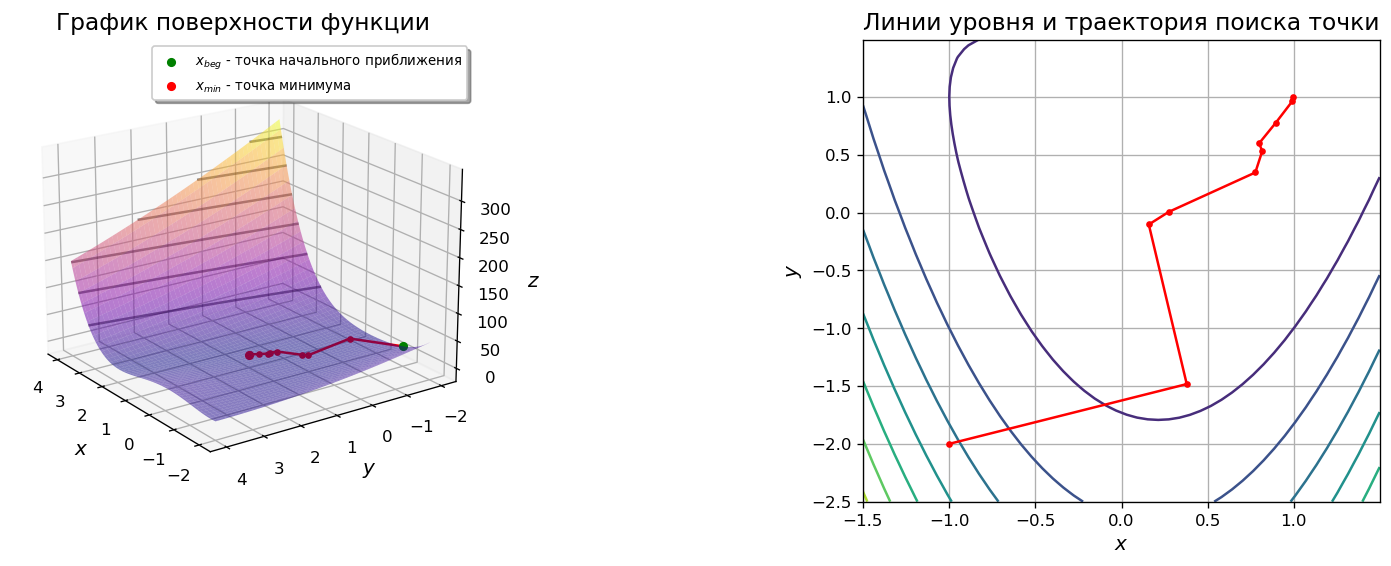

In [119]:
import numpy as np
import math

alpha = 1
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
# h = lambdify((x_, y_), [[diff(foo(x_, y_), x_, 2), diff(foo(x_, y_), x_, y_)], [diff(foo(x_, y_), y_, x_), diff(foo(x_, y_), y_, 2)]], 'numpy')
# H = lambda x: np.array(h(x[0],x[1]))

x0 = [-1, -2]

print_res(foo, x0, 2)

#x_min, xk, w_norm, n_f, n_g , n_d, n_hess = newton_method(foo, eps, x0, 3, 4, 0)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 30, -20)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 45, 170)


# alpha = 200
# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2

# print_res(foo, x0, 2)


<H3> Make pandas.DateFrame </H3>

In [ ]:
import pandas as pd

def make_df(tabledata) -> pd.DataFrame:
        df = pd.DataFrame(tabledata, columns = ['Тип функции', 'Начальная точка', 'Точность', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов', 'Количество вычисленных матриц Гессе' ])
        return df

<H3> Make sheets</H3>

In [ ]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

#x0 = [-1,-2]
def make_sheets(foo, f_type, x0_mass = [[-1, -2]],  e_help = 2, tabledata = [], extra = -1):

    nu = 0.8
    omega = 0.5
    eps = 10**(-e_help)
    x0 = x0_mass[0]

    if f_type == 0:
        func_name = 'Квадратичная функция'
        flag = 0
    else:
        func_name = 'Функция Розенброка'
        flag = 1
        if extra != -1:
            flag = 0
    

    for j in range(len(x0_mass)):
        
        x0 = x0_mass[j]
        
        for i in range (3):
            
            if i == 0:
                method_name = "Метод Ньютона"
                
            elif i == 1:
                method_name = "Модификация метода Ньютона с наискорейшим спуском"
            elif i == 2:
                method_name = "Модификация метода Ньютона с дроблением шага"
                
            x_min, xk, w_norm, n_f, n_g , n_d, n_hess = newton_method(foo, eps, x0, nu, omega, i)
            
            temp = [func_name, x0, round(eps, e_help), method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g, n_hess ]
            tabledata.append(temp)
            
    return tabledata

<H2>
Calculations
</H2>

<H3> Sheets </H3>


In [ ]:
from secrets import randbelow
from tkinter import font


styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%")])]

e_help = 2

x0 = [[-10, 18]]
x0_mass = [[-1,-2], [0,0], [-2,5]]

#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35

foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
tabledata1 = [] # Результаты вычислений квадратичной функции в зависимости от начальной точки
make_sheets(foo, 0, x0_mass, e_help, tabledata1)
df1 = make_df(tabledata1)


alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df2 = make_df(tabledata2)


alpha = 200
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df3 = make_df(tabledata2)

alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata3 = [] # Результаты вычислений функции Розенброка в зависимости от заданной точности

for i in range(2):
    if i == 0:
        e_help = 2
    else: 
        e_help = 6
    make_sheets(foo, 1, x0, e_help, tabledata3)

df4 = make_df(tabledata3)


KeyboardInterrupt: 

In [ ]:
df1 = df1.sort_values('Метод')

df1.style.set_caption('Результаты вычислений квадратичной функции в зависимости от начальной точки').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов,Количество вычисленных матриц Гессе
0,Квадратичная функция,"[-1, -2]",0.010000,Метод Ньютона,"[-0.0, -2.23]",-45.000000,9,180,10,0
3,Квадратичная функция,"[0, 0]",0.010000,Метод Ньютона,"[-0.0, -2.23]",-45.000000,11,220,12,0
6,Квадратичная функция,"[-2, 5]",0.010000,Метод Ньютона,"[-0.0, -2.23]",-45.000000,15,300,16,0
2,Квадратичная функция,"[-1, -2]",0.010000,Модификация метода Ньютона с дроблением шага,"[-0.0, -2.23]",-45.000000,9,180,10,0
5,Квадратичная функция,"[0, 0]",0.010000,Модификация метода Ньютона с дроблением шага,"[-0.0, -2.23]",-45.000000,11,220,12,0
8,Квадратичная функция,"[-2, 5]",0.010000,Модификация метода Ньютона с дроблением шага,"[-0.0, -2.23]",-45.000000,15,300,16,0
1,Квадратичная функция,"[-1, -2]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[-0.0, -2.23]",-45.000000,9,180,10,0
4,Квадратичная функция,"[0, 0]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[-0.0, -2.23]",-45.000000,11,220,12,0
7,Квадратичная функция,"[-2, 5]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[-0.0, -2.23]",-45.000000,15,300,16,0


In [ ]:
df2 = df2.sort_values('Метод')

df2.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 50').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов,Количество вычисленных матриц Гессе
0,Функция Розенброка,"[-1, -2]",0.010000,Метод Ньютона,"[1.01, 1.02]",0.000000,302,6040,303,0
3,Функция Розенброка,"[0, 0]",0.010000,Метод Ньютона,"[0.99, 0.98]",0.000000,56,1120,57,0
6,Функция Розенброка,"[-2, 5]",0.010000,Метод Ньютона,"[1.01, 1.02]",0.000000,1348,26960,1349,0
2,Функция Розенброка,"[-1, -2]",0.010000,Модификация метода Ньютона с дроблением шага,"[1.01, 1.02]",0.000000,302,6040,303,0
5,Функция Розенброка,"[0, 0]",0.010000,Модификация метода Ньютона с дроблением шага,"[0.99, 0.98]",0.000000,56,1120,57,0
8,Функция Розенброка,"[-2, 5]",0.010000,Модификация метода Ньютона с дроблением шага,"[1.01, 1.02]",0.000000,1348,26960,1349,0
1,Функция Розенброка,"[-1, -2]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[1.01, 1.02]",0.000000,302,6040,303,0
4,Функция Розенброка,"[0, 0]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[0.99, 0.98]",0.000000,56,1120,57,0
7,Функция Розенброка,"[-2, 5]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[1.01, 1.02]",0.000000,1348,26960,1349,0


In [ ]:
df3 = df3.sort_values('Метод')

df3.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 200').set_table_styles(styles)


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов,Количество вычисленных матриц Гессе
0,Функция Розенброка,"[-1, -2]",0.010000,Метод Ньютона,"[0.99, 0.98]",0.000000,5167,103340,5168,0
3,Функция Розенброка,"[0, 0]",0.010000,Метод Ньютона,"[1.01, 1.02]",0.000000,1252,25040,1253,0
6,Функция Розенброка,"[-2, 5]",0.010000,Метод Ньютона,"[0.99, 0.98]",0.000000,5585,111700,5586,0
2,Функция Розенброка,"[-1, -2]",0.010000,Модификация метода Ньютона с дроблением шага,"[0.99, 0.98]",0.000000,5167,103340,5168,0
5,Функция Розенброка,"[0, 0]",0.010000,Модификация метода Ньютона с дроблением шага,"[1.01, 1.02]",0.000000,1252,25040,1253,0
8,Функция Розенброка,"[-2, 5]",0.010000,Модификация метода Ньютона с дроблением шага,"[0.99, 0.98]",0.000000,5585,111700,5586,0
1,Функция Розенброка,"[-1, -2]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[0.99, 0.98]",0.000000,5167,103340,5168,0
4,Функция Розенброка,"[0, 0]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[1.01, 1.02]",0.000000,1252,25040,1253,0
7,Функция Розенброка,"[-2, 5]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[0.99, 0.98]",0.000000,5585,111700,5586,0


In [ ]:
df4 = df4.sort_values('Метод')

df4.style.set_caption('Результаты вычислений функции Розенброка в зависимости от заданной точности').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов,Количество вычисленных матриц Гессе
0,Функция Розенброка,"[-10, 18]",0.010000,Метод Ньютона,"[1.01, 1.02]",0.000000,2728,54560,2729,0
3,Функция Розенброка,"[-10, 18]",0.000001,Метод Ньютона,"[1.000001, 1.000002]",0.000000,2844,110916,2845,0
2,Функция Розенброка,"[-10, 18]",0.010000,Модификация метода Ньютона с дроблением шага,"[1.01, 1.02]",0.000000,2728,54560,2729,0
5,Функция Розенброка,"[-10, 18]",0.000001,Модификация метода Ньютона с дроблением шага,"[1.000001, 1.000002]",0.000000,2844,110916,2845,0
1,Функция Розенброка,"[-10, 18]",0.010000,Модификация метода Ньютона с наискорейшим спуском,"[1.01, 1.02]",0.000000,2728,54560,2729,0
4,Функция Розенброка,"[-10, 18]",0.000001,Модификация метода Ньютона с наискорейшим спуском,"[1.000001, 1.000002]",0.000000,2844,110916,2845,0


<H2> Plots </H2>


                                Методы Ньютона 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y - 35
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод Ньютона 

             Точка минимума функции:     x_min = [-0.0, -2.23]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 9
      Количество вычислений функции:       n_f = 180
  Количество вычисленных градиентов:       n_g = 10
Количество вычисленных матриц Гессе:    n_hess = 0


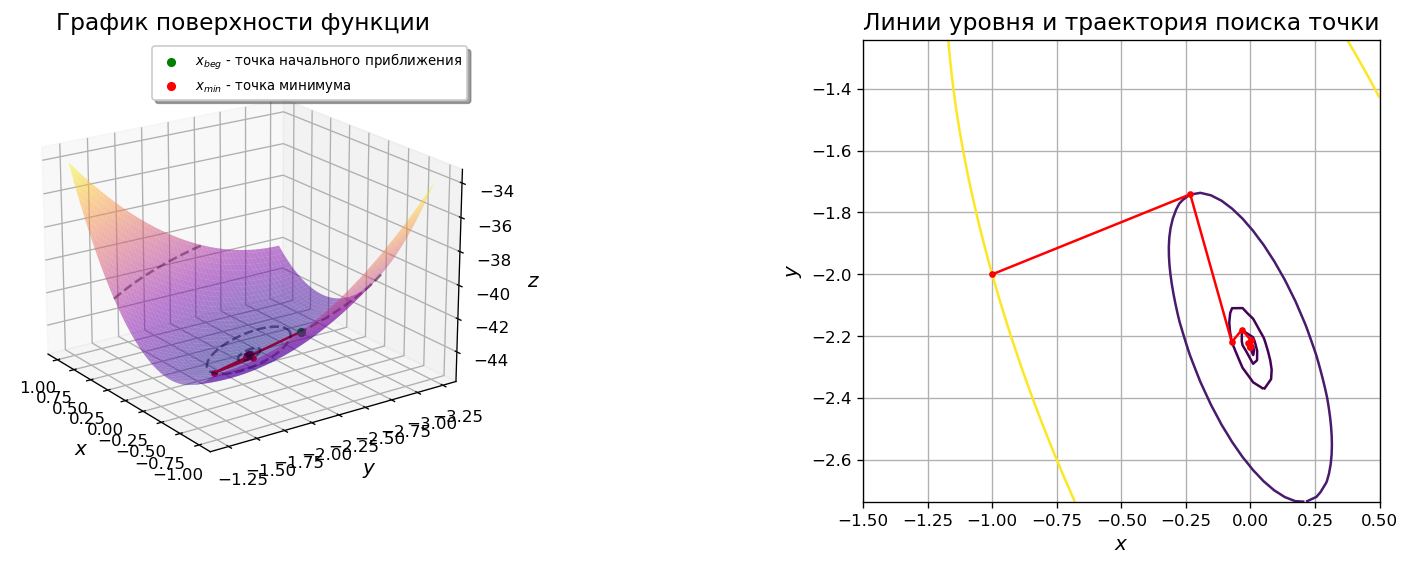


                                Методы Ньютона 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 50*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод Ньютона 

             Точка минимума функции:     x_min = [1.01, 1.02]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 302
      Количество вычислений функции:       n_f = 6040
  Количество вычисленных градиентов:       n_g = 303
Количество вычисленных матриц Гессе:    n_hess = 0


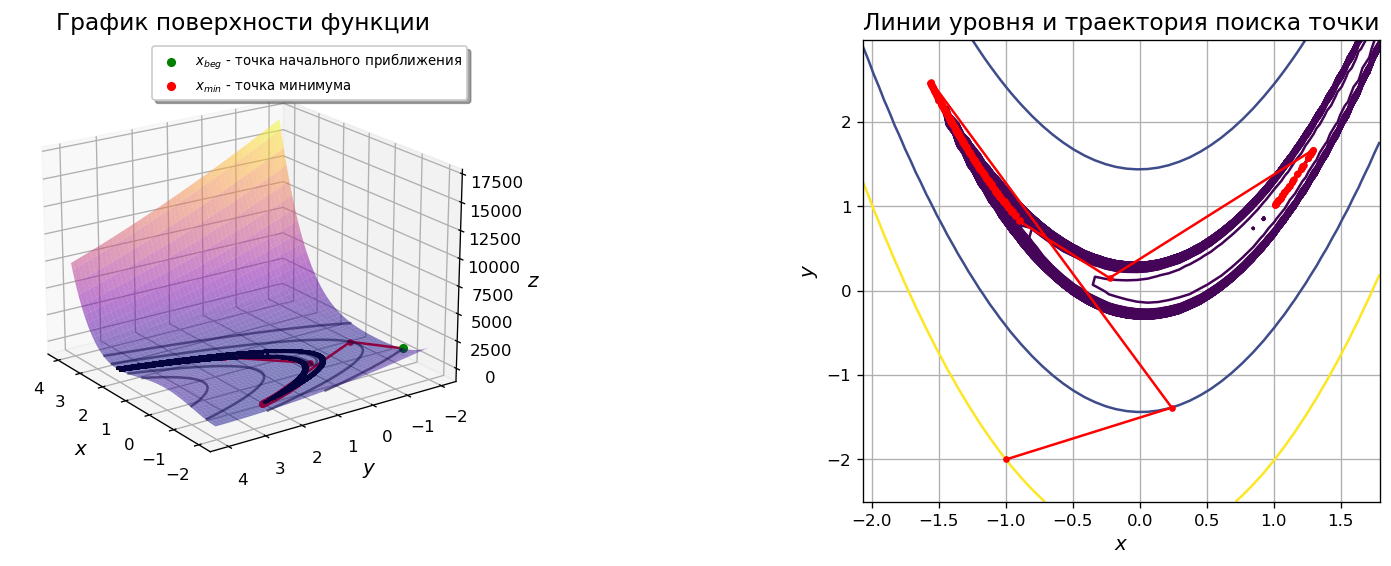


                                Методы Ньютона 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 200*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод Ньютона 

             Точка минимума функции:     x_min = [0.99, 0.98]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 5167
      Количество вычислений функции:       n_f = 103340
  Количество вычисленных градиентов:       n_g = 5168
Количество вычисленных матриц Гессе:    n_hess = 0


KeyboardInterrupt: 

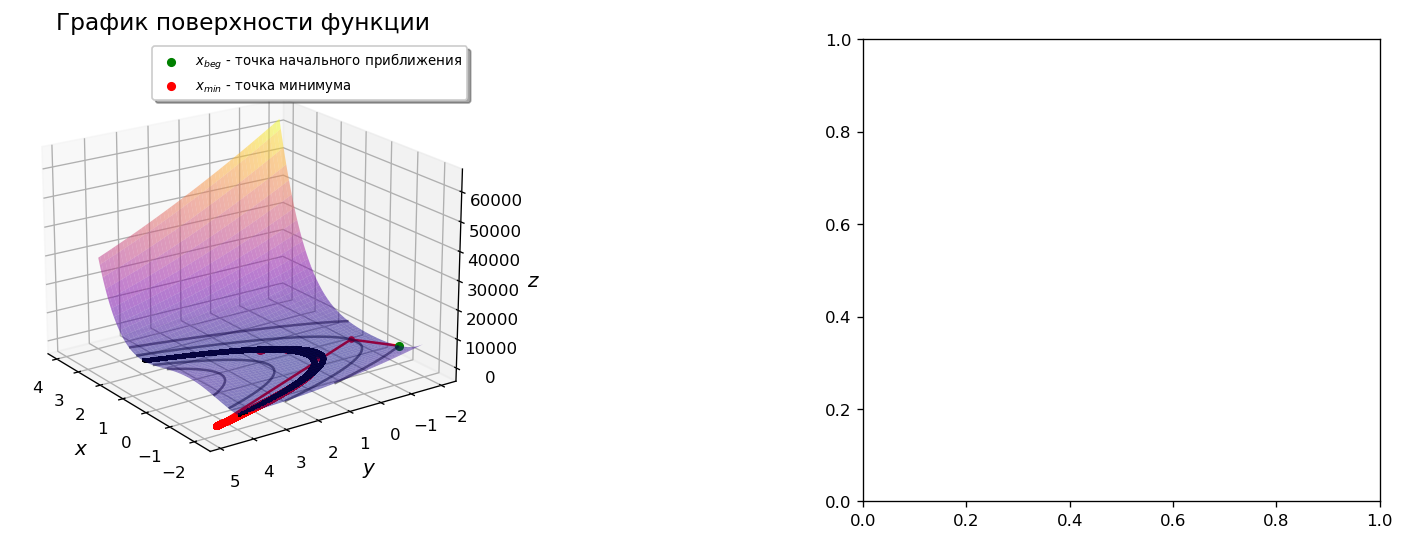

In [ ]:
e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
print_res(foo, x0, 2)

alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22
print_res(foo, x0, 2)

alpha = 200

foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
print_res(foo, x0, 2)

#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16



<H1> Выводы </H1>

            


Как для квадратичной функции, так и для функции Розенброка классический метод Ньютона оказался оптимальным: в нем меньшее количество вычислений градиентов, матриц Гессе, а значеня йункции не вычисляется в принципе. 

Если сравнивать дробление шага и наискорейший спуск, то и для квадратичной функции, и для функции Розенброка метод дробления шага выгоднее по всем параметрам.
